Встановлення необхідних бібліотек

In [1]:
%pip install -r "..\requirements.txt"

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Bogdan\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Імпорт бібліотек

In [189]:
import numpy as np
import matplotlib.pyplot as plt

Завдання 1:

1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random: бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (y = kx + b) для подальшого аналізу результатів.

In [190]:
np.random.seed(13) # для однакової псевдовипадкової генерації на кожній ітерації алгоритму
x = np.linspace(0, 10, 250)
k = 1.237
b = 1.984
noise = np.random.normal(0, 1, len(x))
y = k * x + b
y_noised = y + noise

2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок k^ та b^.

In [191]:
def lsm(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    k = np.sum((x-x_mean) * (y-y_mean)) / np.sum((x-x_mean)**2)
    b = y_mean - k*x_mean
    return k, b

3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).

In [ ]:
k_lsm, b_lsm = lsm(x, y_noised)
k_pol, b_pol = np.polyfit(x, y_noised, 1)

print(f"Початкові параметри прямої: k = {k}, b = {b}")
print(f"Відтворення початкових параметрів методом найменших квадратів: k = {k_lsm}, b = {b_lsm}")
print(f"Різниця: dk = {abs(k-k_lsm):.2e}, db = {abs(b-b_lsm):.2e}")
print(f"Відтворення початкових параметрів функцією np.polyfit: k = {k_pol}, b = {b_pol}")
print(f"Різниця: dk = {abs(k-k_pol):.2e}, db = {abs(b-b_pol):.2e}")
print(f"Різниця між МНК і polyfit: dk = {abs(k_lsm-k_pol):.2e}, db = {abs(b_lsm-b_pol):.2e}")

Початкові параметри прямої: k = 1.237, b = 1.984
Відтворення початкових параметрів методом найменших квадратів: k = 1.1965413485260163, b = 2.0989088809396783
Різниця: dk = 4.05e-02, db = 1.15e-01
Відтворення початкових параметрів функцією np.polyfit: k = 1.1965413485260166, b = 2.098908880939675
Різниця: dk = 4.05e-02, dk = 1.15e-01
Різниця між МНК і polyfit: k = 2.22e-16, b = 3.11e-15


4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її.

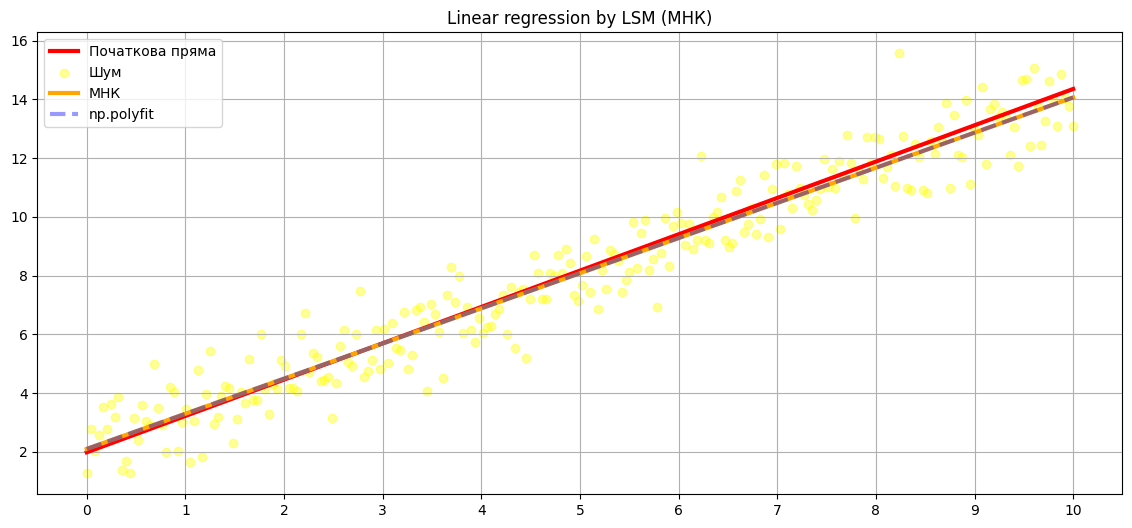

In [194]:
plt.figure(figsize=(14, 6))
plt.title("Linear regression by LSM (МНК)")
plt.plot(x, y, color='red', linewidth=3, label='Початкова пряма')
plt.scatter(x, y_noised, color='yellow', alpha=0.4, label='Шум')
plt.plot(x, k_lsm * x + b_lsm, color='orange', linewidth=3, label='МНК')
plt.plot(x, k_pol * x + b_pol, color='blue', linewidth=3, alpha=0.4, linestyle='--', label='np.polyfit')
plt.xticks(np.arange(0, 11, 1))
plt.legend()
plt.grid(True)
plt.show()

Завдання 2:

1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок k^ та b^. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [1]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000):
    # Ініціалізуємо початкові значення b0 та k0, визначаємо learning_rate, а також кількість ітерацій
    n = len(x)
    b = 0
    k = 0
    MSE = []
    
    for _ in range(n_iter):
        y_i = k * x + b # Обчислюємо поточні прогнози для кожного рядка

        # середньоквадратична помилка
        mse = (1 / n) * np.sum((y - y_i)**2)
        MSE.append(mse)
        
        # Обчислюємо часткові похідні по кожному з параметрів
        dl_db = (-2 / n) * np.sum(y - y_i)
        dl_dk = (-2 / n) * np.sum(x * (y - y_i))
        
        # Оновлюємо параметри, використовуючи знайдені часткові похідні та коефіцієнт навчання
        b -= learning_rate * dl_db
        k -= learning_rate * dl_dk
        
    return k, b, MSE

k_gd, b_gd, mse = gradient_descent(x, y_noised, 0.02, 1000)
print(f"Початкові параметри прямої: k = {k}, b = {b}")
print(f"Відтворення початкових параметрів градієнтним спуском: k = {k_gd}, b = {b_gd}")

NameError: name 'x' is not defined

2. Додайте отриману лінію регресії на загальний графік

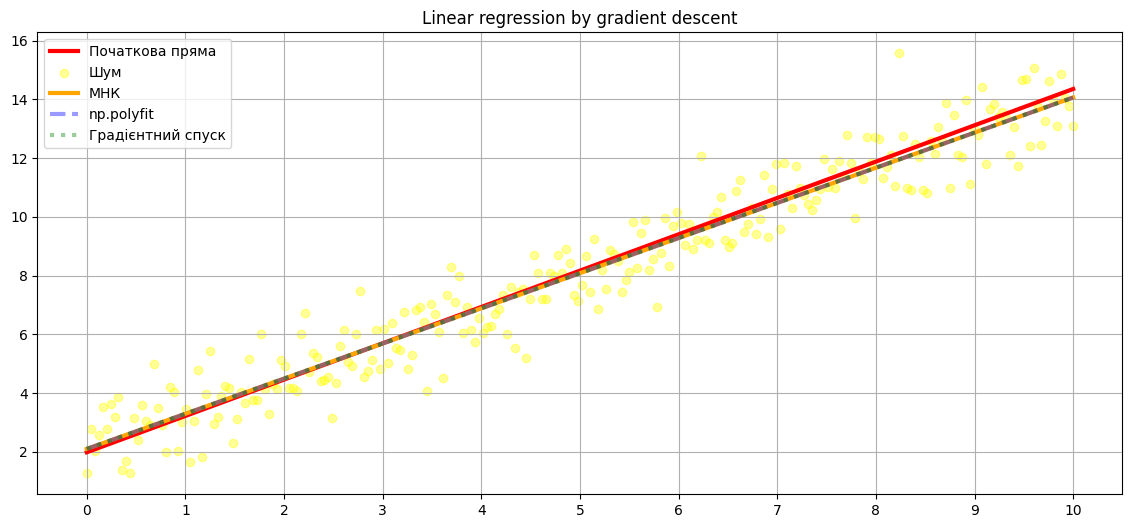

In [196]:
plt.figure(figsize=(14, 6))
plt.title("Linear regression by gradient descent")
plt.plot(x, y, color='red', linewidth=3, label='Початкова пряма')
plt.scatter(x, y_noised, color='yellow', alpha=0.4, label='Шум')
plt.plot(x, k_lsm * x + b_lsm, color='orange', linewidth=3, label='МНК')
plt.plot(x, k_pol * x + b_pol, color='blue', linewidth=3, alpha=0.4, linestyle='--', label='np.polyfit')
plt.plot(x, k_pol * x + b_pol, color='green', linewidth=3, alpha=0.4, linestyle=':', label='Градієнтний спуск')
plt.xticks(np.arange(0, 11, 1))
plt.legend()
plt.grid(True)
plt.show()

3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки

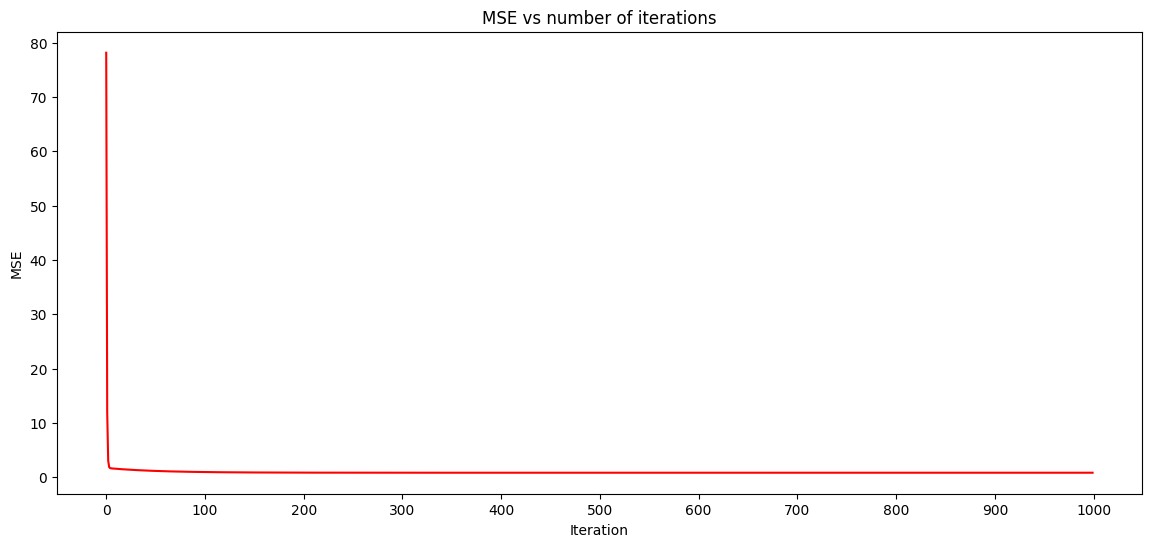

In [197]:
plt.figure(figsize=(14, 6))
plt.title("MSE vs number of iterations")
plt.xlabel("Iteration")
plt.ylabel("MSE")
step = 100
plt.xticks(np.arange(0, len(mse)+step, step))
plt.plot(mse, color='red')

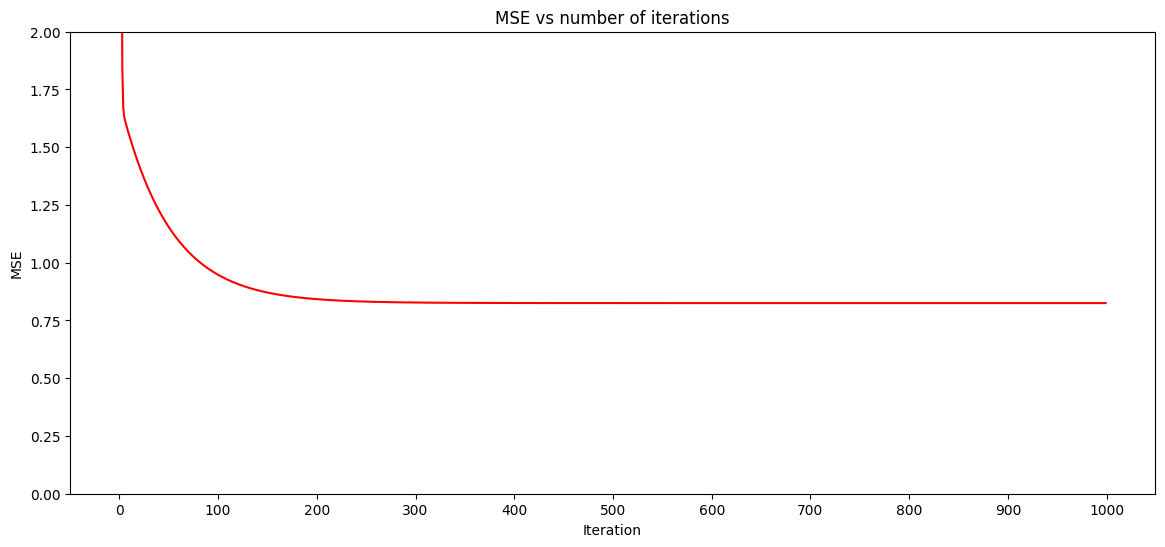

In [198]:
plt.figure(figsize=(14, 6))
plt.title("MSE vs number of iterations")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.ylim(0, 2)
plt.xticks(np.arange(0, len(mse)+step, step))
plt.plot(mse, color='red')

Похибка після нульової ітерації різко впала, і поступово знижується, прямуючи до певного значення (похибки, подібної до МНК)

In [199]:
print(f"Last MSE: {mse[len(mse)-1]}")

Last MSE: 0.8253003747309936


4. Порівняйте отримані результати з результатами попереднього завдання

In [ ]:
print(f"Початкові параметри прямої: k = {k}, b = {b}")
print(f"Відтворення початкових параметрів методом найменших квадратів: k = {k_lsm}, b = {b_lsm}")
print(f"Різниця: dk = {abs(k-k_lsm):.2e}, db = {abs(b-b_lsm):.2e}")
print(f"Відтворення початкових параметрів функцією np.polyfit: k = {k_pol}, b = {b_pol}")
print(f"Різниця: dk = {abs(k-k_pol):.2e}, db = {abs(b-b_pol):.2e}")
print(f"Відтворення початкових параметрів градієнтним спуском: k = {k_gd}, b = {b_gd}")
print(f"Різниця: dk = {abs(k-k_gd):.2e}, db = {abs(b-b_gd):.2e}")
print(f"Різниця між МНК і градієнтним спуском: dk = {abs(k_lsm-k_gd):.2e}, db = {abs(b_lsm-b_gd):.2e}")

Початкові параметри прямої: k = 1.237, b = 1.984
Відтворення початкових параметрів методом найменших квадратів: k = 1.1965413485260163, b = 2.0989088809396783
Різниця: dk = 4.05e-02, db = 1.15e-01
Відтворення початкових параметрів функцією np.polyfit: k = 1.1965413485260166, b = 2.098908880939675
Різниця: dk = 4.05e-02, dk = 1.15e-01
Відтворення початкових параметрів градієнтним спуском: k = 1.1965557320013445, b = 2.098813506078566
Різниця: dk = 4.04e-02, dk = 1.15e-01
Різниця між МНК і градієнтним спуском: k = 1.44e-05, b = 9.54e-05
